In [1]:
import pennylane as qml 
print(f'Pennylane Version : {qml.__version__}')

Pennylane Version : 0.31.0


In [2]:
import states
import dmrgqcnn as qcnn   # QCNN class

import matplotlib.pyplot as plt

## QCNN class

In [3]:
# Either way the states are computed (with the exact_states class or with the DMRG)
# the QCNN class require a list of the ground states, and the list of the parameters (k, h)
#
# INPUTS:
# _______________________________
# | STATES        |  PARAMETERS |
# |---------------|-------------|
# | state1 (2**n) | [h1, k1]    |
# | state2 (2**n) | [h2, k2]    |
# | ...           | ...         |
# | stateL (2**n) | [hL, kL]    |
# |_____________________________|

#                      STATES,          PARAMETERS
#                                              total number of states is n_hs * n_kappas
classifier = qcnn.qcnn(*states.get_fake_states(N = 8, n_hs = 20, n_kappas = 20))

In [4]:
# TRAIN ON THE 3 PHASES (ANTIPHASE, FERROMAGNETIC AND PARAMAGNETIC)
# just like in the paper, by only using the point in the two axes which are analytical

# Maybe with an higher system size, the trash class will be able to detect the floating phase
res = classifier.train3(epochs  = 1000,
                        lr      = 5e-3,
                        loss_fn = qcnn.cross_entropy)

  0%|          | 0/1000 [00:00<?, ?it/s]/home/saverio/.local/lib/python3.10/site-packages/autoray/autoray.py:981: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return x.astype(dtype, **kwargs)
100%|██████████| 1000/1000 [00:07<00:00, 137.31it/s]


Text(0.5, 0, 'Epochs')

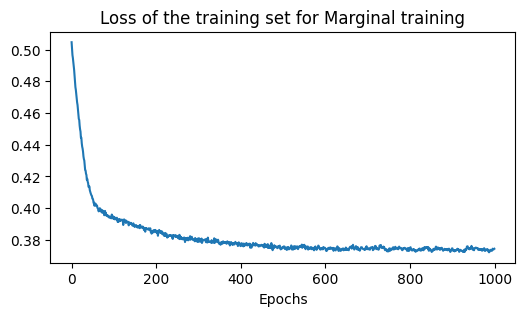

In [5]:
plt.figure(figsize=(6,3))
plt.plot(res)
plt.title('Loss of the training set for Marginal training')
plt.xlabel('Epochs')

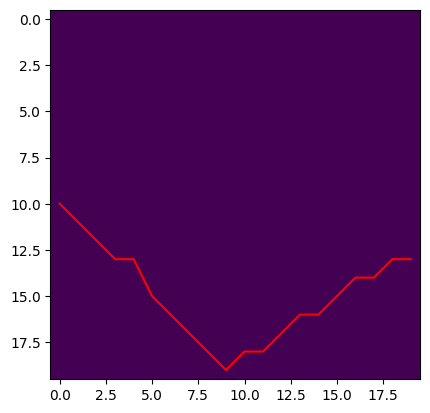

In [6]:
aaa = classifier.show_prediction3()

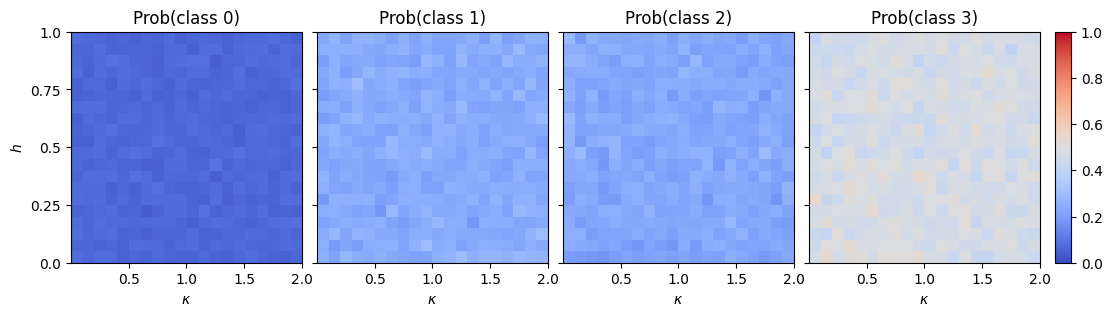

In [7]:
# PROBABILITIES OF EVERY CLASS
# class 0 is the trash class, there is no point in the training set with this label
classifier.showclasses()